# Import library

In [80]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Read the image

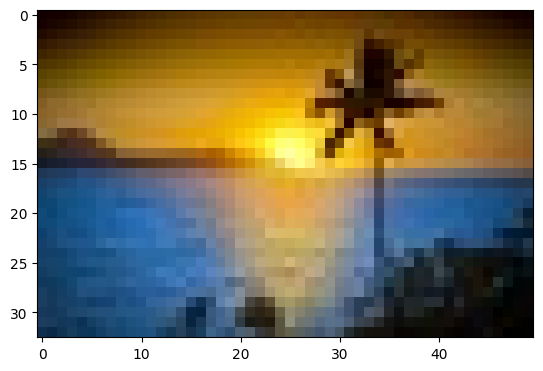

In [81]:
image = plt.imread("sun-1.jpg")
plt.imshow(image)

# Preprocessing image

In [82]:
img = np.array(image, dtype=np.float64) / 255

w, h, d = image.shape
assert d == 3 
image_array = img.reshape(w * h, d) 
print(image_array.shape)

(1650, 3)


In [83]:
print( f"There are {len( np.unique(image_array, axis=0))} distinct colors on {w*h} pixels" )

There are 1612 distinct colors on 1650 pixels


# Define functions

In [84]:
import math
import random

def euclidean_distance(x, y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2 + (x[2] - y[2])**2)

def mahattan_distance(x, y):
    return x-y

In [85]:
def kernel(bandwidth, dis):
    if dis < bandwidth:
        return 1
    else: 
        return 0

def shiftMode(data, pre, bandwidth):
#     mode = (x*kernel(bandwidth, euclidean_distance(x, pre)) for x in sampled_data)/(kernel(bandwidth, euclidean_distance(x, pre)) for x in sampled_data)
    numerator = 0
    denominator = 0
    for x in data:
        kernel_value = kernel(bandwidth, euclidean_distance(x, pre))
        numerator += x * kernel_value
        denominator += kernel_value
    mode = numerator / denominator
    return mode

In [86]:
n = image_array.shape[0]
n

1650

In [87]:
mode = [[] for i in range(n)]

In [88]:
import numpy as np

# This function used to estimate the bandwidth based on k nearest neighbors distances
def estimate_bandwidth(data, k):
    n = data.shape[0]
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances[i, j] = euclidean_distance(image_array[i], image_array[j])
            
    sorted_distances = np.sort(distances, axis=1)
    nearest_neighbors = sorted_distances[:, 1:k+1]
    
    bandwidth = np.mean(nearest_neighbors)
    
    return bandwidth

In [89]:
estimated = estimate_bandwidth(image_array, 30)

# Meanshift

In [90]:
from datetime import datetime
start_time = datetime.now()
threshold = 1e-6
bandwidth = estimated
# mode = [[]]

for i in range(n):
    m = 0
    mode[i].append(image_array[i])
    flag = True
    if i%500 == 0:
      print(f"This is the {i} pixel")
    while flag == True:
        mode[i].append(shiftMode(image_array, mode[i][m], bandwidth)) 
        m = m+1
        if euclidean_distance(mode[i][m], mode[i][m-1]) < threshold:
            flag = False
    mode[i][0] = mode[i][m]
    # print(mode[i][0])

This is the 0 pixel
This is the 500 pixel
This is the 1000 pixel
This is the 1500 pixel


# Divide to clusters

In [91]:
clusters = []
for i in range(n):
    if tuple(mode[i][0]) not in clusters:
        clusters.append(tuple(mode[i][0]))


[(0.07637254901960781, 0.020098039215686276, 0.005490196078431373),
 (0.09738562091503271, 0.01516339869281046, 0.0),
 (0.09867172675521825, 0.01606578115117015, 0.0001265022137887413),
 (0.18736383442265803, 0.08300653594771244, 0.0035947712418300647),
 (0.20413354531001598, 0.09475357710651833, 0.0042395336512983575),
 (0.2604166666666667, 0.14178921568627445, 0.003553921568627451),
 (0.2797001153402538, 0.15824682814302193, 0.002768166089965398),
 (0.29038281979458463, 0.16778711484593842, 0.0028944911297852476),
 (0.330637254901961, 0.20089869281045747, 0.0035947712418300643),
 (0.38331671651711513, 0.23143901628447974, 0.004652708541043535),
 (0.38759241401478595, 0.23407264545162315, 0.005593056894889101),
 (0.3971014492753619, 0.24364876385336745, 0.005399261153736857),
 (0.39901960784313684, 0.24446366782006923, 0.005420991926182238),
 (0.4020184544405993, 0.24700115340253756, 0.005651672433679354),
 (0.4067787114845933, 0.25126050420168067, 0.005938375350140054),
 (0.387238285

# Segmented Image

In [92]:
mode_arr = [m[0] for m in mode]

labels_meanshift = np.array(mode_arr)
        
unique_labels = np.unique(labels_meanshift)
cluster_name = np.zeros(len(labels_meanshift), dtype=int)

for i, label in enumerate(unique_labels):
    cluster_name[np.where(labels_meanshift == label)[0]] = i

(-0.5, 49.5, 32.5, -0.5)

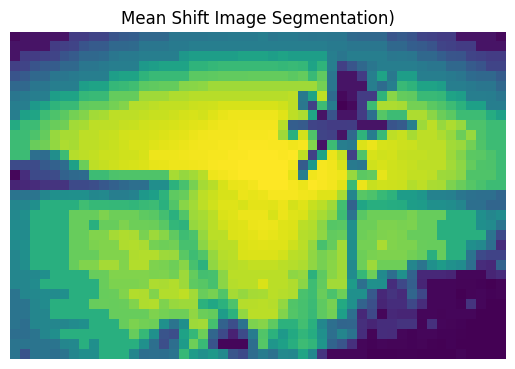

In [96]:
plt.imshow(cluster_name.reshape(w, h))
plt.title('Mean Shift Image Segmentation)')
plt.savefig("Meanshift.png")
plt.axis('off')

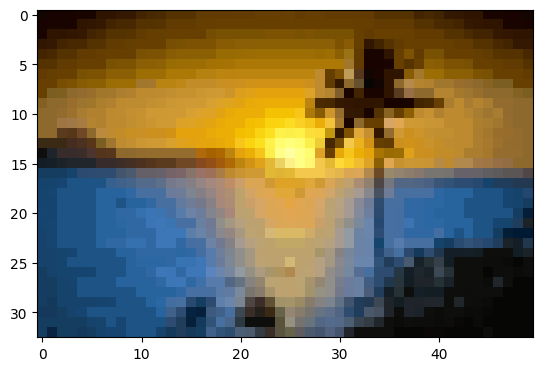

In [94]:
import matplotlib.pyplot as plt
labels_meanshift = []
for i in range(n):
    labels_meanshift.append(mode[i][0])
plt.imshow(np.array(labels_meanshift).reshape(w, h, d))

In [95]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:58.635427
